# Ejercicio 1 - guía 9

Estamos interesados en la proporción de éxito 𝜃 de una distribución Bernoulli. Tenemos una
muestra observada que consiste en el número de éxitos en 30 ensayos independientes y con idéntica distribución de una binomial con parámetro 𝜃; en esta muestra hay precisamente 19 éxitos.

## a)
Suponiendo una prior uniforme sobre 𝜃, calcular la distribución posterior y graficarla. ¿Cuál
es el 90% HPDI?

### Desarrollo

Primero armo el modelo:

In [1]:
import pymc as pm

with pm.Model() as model:
    
    # Defino prior uniforme
    theta = pm.Beta('theta', alpha=1, beta=1)

    # Likelihood
    y = pm.Binomial('observacion', n=30, p=theta, observed= 19)
    
    # Tomo la traza de la posterior
    traza = pm.sample(10000, tune=1000, return_inferencedata=True, random_seed=42)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


c:\Users\gerar\OneDrive\Documentos\Mis Archivos\Estadistica e 
Inferencia\estat_inferencia\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 25 seconds.


Y ahora con la traza obtenida grafico la posterior:

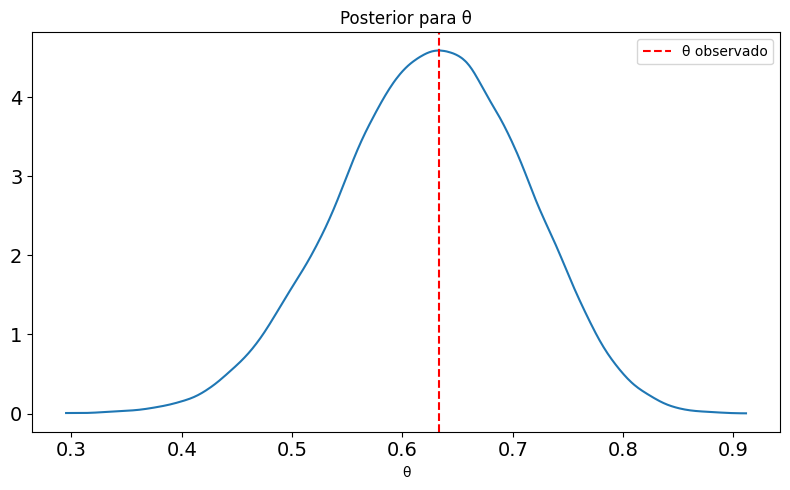

In [2]:
import matplotlib.pyplot as plt
import arviz as az

plt.figure(figsize=(8, 5))
az.plot_dist(traza.posterior["theta"])
plt.axvline(19/30, color='red', linestyle='--', label='θ observado')
plt.title('Posterior para θ')
plt.xlabel('θ')
plt.legend()
plt.tight_layout()
plt.show()

Y ahora miro cúal es su **90% HPDI**:

In [3]:
with model:
    hpdi_90 = pm.hdi(traza, hdi_prob=0.90)
    
print("90% HPDI para θ:", hpdi_90["theta"].values)

90% HPDI para θ: [0.48869609 0.76442783]


## b)
Calcular para cada 𝑘 la probabilidad de obtener 𝑘 éxitos en 10 experimentos con la posterior
predictive. ¿Se trata ésta de una distribución binomial?

### Desarrollo

Calculo la probabilidad para cada k de los 10 experimentos:

In [4]:
from scipy.stats import binom
import numpy as np

exps_post_predictive = binom.rvs(n = 10, p = traza.posterior['theta'].values[0], size = 10000)

for i in range(10 + 1):
    print(f'P(y = {i}): {np.mean(exps_post_predictive == i)}')

P(y = 0): 0.0001
P(y = 1): 0.0038
P(y = 2): 0.014
P(y = 3): 0.0445
P(y = 4): 0.1025
P(y = 5): 0.1707
P(y = 6): 0.2137
P(y = 7): 0.2123
P(y = 8): 0.1508
P(y = 9): 0.0709
P(y = 10): 0.0167


No es una distribución binomial ya que integra por sobre todos los $\theta$ posibles de acuerdo a la posterior. Matemáticamente:

$$p(\tilde{y}|y) = \int_0^1 p(\tilde{y}|y,\theta)p(\theta|y)d\theta $$
$$p(\tilde{y}|y) = \int_0^1 p(\tilde{y}|\theta)p(\theta|y)d\theta $$

Por ser los dos experimentos independientes dado $\theta$

$$p(\tilde{y}|y) = \int_0^1 Bi(\tilde{y}|\theta,n)Beta(y+1,n-y+1)d\theta $$
Y esta expresión define una distribución beta-binomial.